In [1]:
pip install statsbombpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from statsbombpy import sb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
wc2022 = sb.matches(43,106)
wc2022.head()

/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


In [5]:
# Assuming df is your DataFrame
japan_games = wc2022[(wc2022['home_team'] == 'Japan') | (wc2022['away_team'] == 'Japan')]
japan_games

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
24,3869219,2022-12-05,17:00:00.000,International - FIFA World Cup,2022,Japan,Croatia,1,1,available,...,2023-06-21T16:56:21.929024,4,Round of 16,Al Janoub Stadium,Ismail Elfath,Hajime Moriyasu,Zlatko Dalić,1.1.0,2,2
31,3857295,2022-11-27,12:00:00.000,International - FIFA World Cup,2022,Japan,Costa Rica,0,1,available,...,2023-06-20T11:17:33.935113,2,Group Stage,Ahmad bin Ali Stadium,Michael Oliver,Hajime Moriyasu,Luis Fernando Suárez Guzman,1.1.0,2,2
33,3857284,2022-11-23,15:00:00.000,International - FIFA World Cup,2022,Germany,Japan,1,2,available,...,2023-04-27T00:40:34.335400,1,Group Stage,Sheikh Khalifa International Stadium,Ivan Arcides Barton Cisneros,Hans-Dieter Flick,Hajime Moriyasu,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2023-04-26T23:51:48.352990,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [6]:
japGerm = sb.events(3857284)
japGerm = japGerm[~japGerm['type'].isin(['Half Start', 'Starting XI', 'Half End', 'Substitution'])]
japGerm['shot_statsbomb_xg'].fillna(0,inplace = True)
japGerm = japGerm.sort_values(by=['minute','timestamp'])
japGerm.head()

/Users/jotayamaguchi/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,50_50,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:00.219,Pass,NaN
1126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:01.252,Ball Receipt*,NaN
2149,NaN,NaN,NaN,NaN,NaN,NaN,"[60.5, 41.8]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:01.252,Carry,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:02.979,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Japan,778,00:00:05.222,Pass,NaN


In [7]:
japGerm['germ_xgs'] = japGerm[japGerm['team_id'] == 770]['shot_statsbomb_xg'].cumsum()
japGerm['japan_xgs'] = japGerm[japGerm['team_id'] == 778]['shot_statsbomb_xg'].cumsum()

current_xgs = 0
for ind, row in japGerm.iterrows():
    if pd.isna(row['germ_xgs']):
        japGerm.at[ind, 'germ_xgs'] = current_xgs
    else:
        current_xgs = row['germ_xgs']

current_xgsj = 0
for ind, row in japGerm.iterrows():
    if pd.isna(row['japan_xgs']):
        japGerm.at[ind, 'japan_xgs'] = current_xgsj
    else:
        current_xgsj = row['japan_xgs']


In [8]:
pass_count = 0
germ_pass = 0
japan_pass = 0
japGerm['japan_poss'] = None
japGerm['japan_pass'] = None
japGerm['germ_poss'] = None
japGerm['germ_pass'] = None
germ_poss = 0
japan_poss = 0
for ind, row in japGerm.iterrows():
    if row['type'] == 'Pass':
        pass_count = pass_count + 1
        if row['team_id'] == 770:
            germ_pass += 1
        else:
            japan_pass += 1
        
        japan_poss = japan_pass/pass_count
        japGerm.at[ind, 'japan_poss'] = japan_poss
            
        germ_poss = germ_pass/pass_count
        japGerm.at[ind, 'germ_poss'] = germ_poss
    else:
        japGerm.at[ind,'germ_poss'] = germ_poss
        japGerm.at[ind, 'japan_poss'] = japan_poss
japGerm['germ_poss'][-5:]

2148    0.7375
2938    0.7375
3208    0.7375
3285    0.7375
3447    0.7375
Name: germ_poss, dtype: object

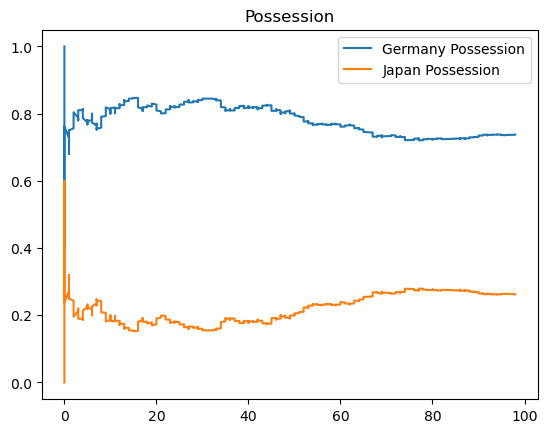

In [9]:
plt.plot(japGerm['minute'], japGerm['germ_poss'], label='Germany Possession')
plt.plot(japGerm['minute'],japGerm['japan_poss'], label='Japan Possession')

plt.title('Possession')
plt.legend()
plt.show()

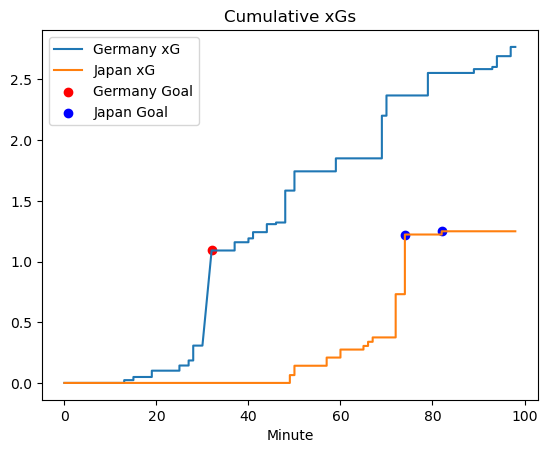

In [10]:
import matplotlib.pyplot as plt

plt.plot(japGerm['minute'], japGerm['germ_xgs'], label='Germany xG')
plt.plot(japGerm['minute'], japGerm['japan_xgs'], label='Japan xG')

germany_goal = japGerm[(japGerm['team_id'] == 770) & (japGerm['shot_outcome'] == 'Goal')]

japan_goal = japGerm[(japGerm['team_id'] == 778) & (japGerm['shot_outcome'] == 'Goal')]

plt.scatter(germany_goal['minute'], germany_goal['germ_xgs'], color = 'red', label ='Germany Goal')
plt.scatter(japan_goal['minute'], japan_goal['japan_xgs'], color = 'blue', label = 'Japan Goal')

plt.legend()
plt.title('Cumulative xGs')
plt.xlabel('Minute')  # Labeling the x-axis

plt.show()


In [11]:
jap_shotcount = 0
germ_shotcount = 0

for ind, row in japGerm.iterrows():
    if row['type'] == 'Shot':
        if row['team_id'] ==770:
            germ_shotcount+=1
        else:
            jap_shotcount+=1
print(jap_shotcount)
print(germ_shotcount)

12
26


In [17]:
germ_xg = japGerm['germ_xgs'].iloc[-1]
japan_xg = japGerm['japan_xgs'].iloc[-1]

jap_xgs_per_shot = japan_xg/jap_shotcount
germ_xgs_per_shot = germ_xg/germ_shotcount

print(germ_xg)
print(japan_xg)


2.768019421
1.2492595809999998


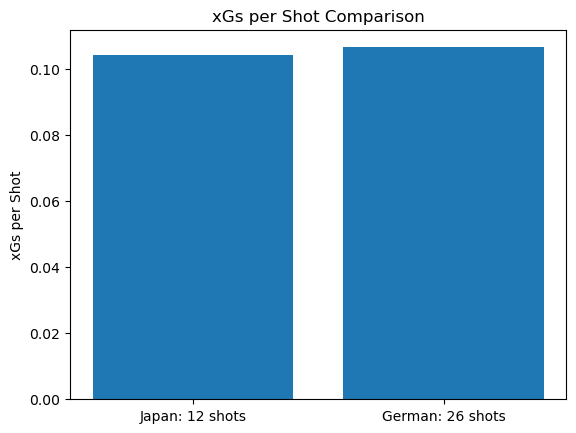

In [13]:

plt.bar(['Japan: 12 shots', 'German: 26 shots'], [jap_xgs_per_shot, germ_xgs_per_shot])

# Adding labels and title
plt.ylabel('xGs per Shot')
plt.title('xGs per Shot Comparison')

# Show the plot
plt.show()


In [52]:
xgs = japGerm[japGerm['type']=='Shot']
xgs = xgs[['shot_statsbomb_xg', 'shot_outcome', 'minute', 'team']].sort_values(by='shot_statsbomb_xg', ascending = False).reset_index(drop=True)
xgs[xgs['shot_outcome']=='Goal']

,shot_statsbomb_xg,shot_outcome,minute,team
0,0.783500,Goal,32,Germany
1,0.477751,Goal,74,Japan
31,0.026684,Goal,82,Japan


In [24]:
germ = japGerm[japGerm['team_id'] == 770]['shot_statsbomb_xg']
jap = japGerm[japGerm['team_id'] == 778]['shot_statsbomb_xg']

In [48]:
germ = [x for x in germ if x != 0]
jap = [x for x in jap if x!=0]
germ

[0.022911863,
 0.026021937,
 0.05193508,
 0.042519,
 0.041637745,
 0.12241382,
 0.7835,
 0.028658802,
 0.03933018,
 0.031919174,
 0.05113006,
 0.06614002,
 0.013327111,
 0.047906045,
 0.21508263,
 0.15860753,
 0.10696415,
 0.32657883,
 0.02483029,
 0.11167552,
 0.0550312,
 0.18550046,
 0.031593546,
 0.017847534,
 0.088851534,
 0.07610536]

In [32]:
germt = 1
japt = 1
for i in germ:
    germt = germt*i
for i in jap:
    japt = japt*i

In [35]:
germt < japt

True

In [36]:
print(germt)
print(japt)

5.253019586183292e-32
2.807521865401794e-15


In [49]:
# Example list of probabilities
probabilities = [0.75, 0.45, 0.3, 0.6]

# Calculate the probability that none of the events occur (complement of the union)
probability_none_occur = 1
for p in germ:
    probability_none_occur *= (1 - p)

# Calculate the probability of at least one event happening
probability_of_union = 1 - probability_none_occur

print("Probability of at least one event happening:", probability_of_union)


Probability of at least one event happening: 0.9749207748858472


In [50]:
# Example list of probabilities
probabilities = [0.75, 0.45, 0.3, 0.6]

# Calculate the probability that none of the events occur (complement of the union)
probability_none_occur = 1
for p in jap:
    probability_none_occur *= (1 - p)

# Calculate the probability of at least one event happening
probability_of_union = 1 - probability_none_occur

print("Probability of at least one event happening:", probability_of_union)

Probability of at least one event happening: 0.7740112296367412
